Image Colour Palette Generator

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  
import numpy as np
from collections import Counter
import webcolors

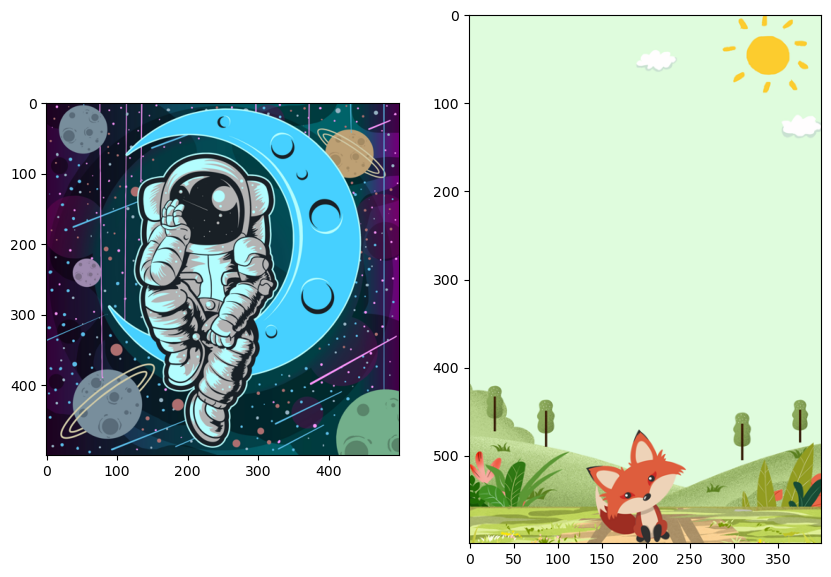

In [36]:
#Load and Show Sample Images
img1 = Image.open('images/Image1.png')
image1 = img1.resize((500, 500))
save_dir = 'Images/'
image1.save(save_dir + 'myImage1.png')


img2 = Image.open('images/Image2.jpg')
image2 = img2.resize((400, 600))
image2.save('Images/myImage2.png')

#Show Sample Images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image1)
ax[1].imshow(image2);





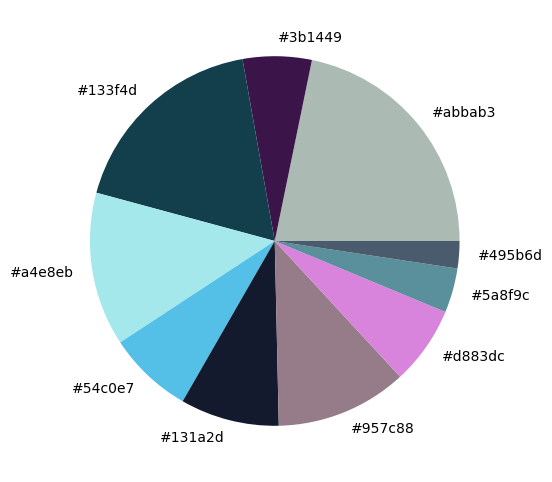

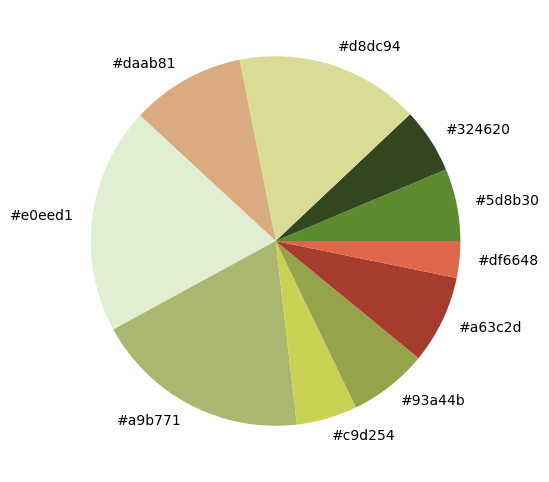

In [23]:
#Find Hex codes of the most common colors in the images k-means clustering

def get_colors(image, number_of_colors, show_chart):
    colors = []
    modified_image = image.convert('RGB')
    modified_image = modified_image.resize((400, 600), Image.Resampling.NEAREST)
    for count, (r, g, b) in modified_image.getcolors(400 * 600):
        colors.append((r, g, b))
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(colors)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors

#Convert RGB to Hex
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


#Get the most common colors in the images
get_colors(image1, 10, True);

get_colors(image2, 10, True);





In [34]:
#Now we can use the hex codes to find the closest color name in the webcolors library

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return closest_name

print("****************************************************")
#Get the webcolors names of the most common colors in the images
for i in get_colors(image1, 10, False):
    print(f"Closest color name (1st Image): {get_colour_name(i)}\n")

print("****************************************************")


****************************************************
Closest color name (1st Image): orchid

Closest color name (1st Image): black

Closest color name (1st Image): midnightblue

Closest color name (1st Image): paleturquoise

Closest color name (1st Image): darkgray

Closest color name (1st Image): darkslategray

Closest color name (1st Image): gray

Closest color name (1st Image): cadetblue

Closest color name (1st Image): mediumturquoise

Closest color name (1st Image): dimgray

****************************************************


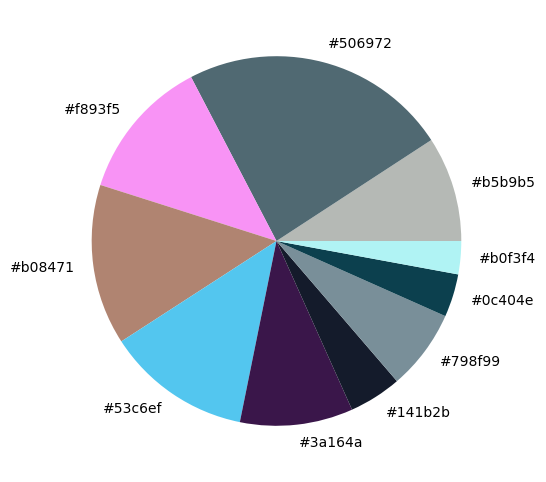

In [41]:
#Now let's create one function that does all of the above

def get_image_color_and_show(number_of_colors, show_chart):
    #get a picture from the user
    image = input("Enter the image path: ")
    image = Image.open(image) 
    number_of_colors = int(input("Enter the number of colors: "))
    show_chart = input("Show chart? (y/n): ")
    if show_chart == 'y':
        show_chart = True
    else:
        show_chart = False
    colors = []
    modified_image = image.convert('RGB')
    modified_image = modified_image.resize((400, 600), Image.Resampling.NEAREST)
    for count, (r, g, b) in modified_image.getcolors(400 * 600):
        colors.append((r, g, b))    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(colors)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors

my_image = get_image_color_and_show(10, True)

